# **Image Classification [Part 2]**
---

**Required Reading**

[Ian Goodfellow's Deep Learning - Chapter 1, Section 6.2, and Section 8.1](https://www.deeplearningbook.org/contents/intro.html)

**Additional Reading/Viewing**

[Outstanding YouTube Series from 3 Blue 1 Brown](https://www.youtube.com/watch?v=aircAruvnKk)

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

## 1. Convolutional Neural Networks
---

- Last time, in Image Classification Part 1, we left off wondering how Yann LeCun beat our 5 layer deep network way back in 1998. 
- Here's a clip of Yann in 1993 at AT&T Bell Labs demonstrating LeNet-1, a precursor to his 1998 network.

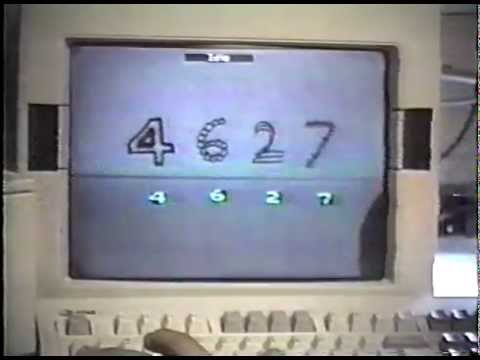

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FwFduRA_L6Q', width = 960, height = 540)

- Yann LeCun joined AT&T Bell Labs in 1988 after leaving a postdoc position on Geoff Hinton's lab at the University of Toronto. 
- LeCun's research focused on optical charecter recognition (OCR), and developed a system that was used to read 10% of all the checks in the US in the late 1990s and early 2000s. [Source](https://en.wikipedia.org/wiki/Yann_LeCun).
- His collaborators at AT&T included Leon Bottou and [Vladimir Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik).
- In 2013, Yann became the director of Facebook AI Research (FAIR). 

### **So how did Yann Lecun beat our 5-layer deep network way back in 1998?**


- The key difference between Yann's network and ours is an idea that Yann called **weight sharing** in his [1989 Publication on Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf).

![](../graphics/birth_of_modern_cnn-01.png)

- Today we call Yann's idea a Convolutional Neural Network (CNN). 
- [Goodfellow](https://www.deeplearningbook.org/contents/convnets.html) gives a nice CNN definition: 
*"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers."*

### **They Should Really Be Called "Cross Correlation Neural Networks"**

![](../graphics/filter_animation.gif)

- The convolution operation is used in many areas of mathematics and engineering, we can express 2d convolution like this:
$$
S(i, j) = \sum_m \sum_n I(i-m, j-n)K(m, n)
$$
- Where $I$ is our input image, $K$ is kernel and S is our output. 
- Subtracting $m$ and $n$ from $i$ and $j$ has the effect of flipping our kernel $K$ makes convolution commutative. However, in Convolutional Neural Networks, we don't really care about the commutative property, and many libraries, including tensorflow implement the **cross-correlation** function instead of **convolution**:

$$
S(i, j) = \sum_m \sum_n I(i+m, j+n)K(m, n)
$$

![](../graphics/spacer_small.png)

### 1.1 CNN Walkthrough
---

- Let's walkthrough how CNNs process input images. 
- We'll borrow some slides from [Stanford's CS 231n: Convolutional Neural Networks for Visual Recognition](https://www.youtube.com/watch?v=LxfUGhug-iQ&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=7).
- A nice way to think about the convolutional operations we apply in neural networks is **operations on volumes**, as opposed to the operations on vectors we saw with regular neural networks:


In [2]:
from IPython.display import Image, display
from ipywidgets import interact

def slide_show(slide_num=1):     
    display(Image('../graphics/cs_231n_cnn_slides/cs_231n_' + str(slide_num) + '.png'))

In [3]:
interact(slide_show, slide_num = (1, 5));

interactive(children=(IntSlider(value=1, description='slide_num', max=5, min=1), Output()), _dom_classes=('wid…

![](../graphics/spacer_small.png)

### 1.2 Padding + Strides
---

- As you can imagine, there are many variants of convolution used in CNNs, there's a [really great paper on this](https://arxiv.org/pdf/1603.07285.pdf). 
- Changing our padding or strides will change the size of our data as it flows through our network. 

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

![](../graphics/spacer_small.png)

### 1.3 How is LeNet-5 so good?
---

- As nicely stated the exceprt from Yann Lecun's 1989 paper above, CNNs "allow us to express information about the geometry and topology of the task". The arrangement of the pixels in our images is not arbitrary, and we know the lots of information can be gleaned by looking at local neighborhoods of our images (such as edge detection) - CNNs are a good for this. 
- Aside from taking advantage of the topology of images, CNNs are also **incredibly efficient**. 
- Let's have a look at LeCun's 1998 convolutional neueral network, LeNet-5, that achieves a 99.05 accuracy on mnist.

![](../graphics/question_two-01.png)

---

![](../graphics/question_three-01.png)

- So, the first layer of LeNet-5 has way less parameters than our 7 layer fully connected layers. 
- **Why might this be advantageous?**

![](../graphics/spacer_small.png)

### 1.4 Pooling
---

- Let's look at one more interesting idea from LeNet-5. After each convolutional layer, Yann includes a "subsampling" layer. Today we call this a **pooling** layer. 

![](../graphics/lenet_5_screenshot.png)

- Notice that after each of Yann's pooling layers, our feature maps decrease in size by a factor of 2. 

 ![](../graphics/pooling-01.png)

- Pooling makes our networks **approximately invariant** to translations in our input. 
- This can be advantageous in problems like image classification, where the exactly location of features is less important than their general location. 
- Pooling also reduces the size of our data at it flows through our network, allowing us to effectively make our networks smaller and more efficient.

### 1.5 Let's Train LeNet-5!
---

- We'll implement a modern version of LeNet-5, with a few changes from Yann's original implementation:
    - Activation functions immediately follow conv layers, not pooling layers. 
    - Our pooling layers don't have learnable parameters, unlike LeCun's sub-sampling layers 
    - We'll using a cross entropy cost function, LeNet used radial basis functions 
    - We'll using the Adam optimizer, LeCun used gradient descent with a variable learning rate.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

- We'll borrow this method from Jeremy Howard's great [neural network tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html), that will allow us to use view to rehshape our tensor after our convolutional layers.
- Apparently doing this is a bit contreversial, the PyTorch authors would prefer you create your models using classes, as we saw in our introduction_to_pytorch notebook, where the fastai preferece is to use nn.Sequential to create models. 

In [5]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

![](../graphics/lenet_5_screenshot.png)

In [6]:
# Modern Version of LeNet-5 in Pytorch
model = nn.Sequential(nn.Conv2d(1, 6, kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     nn.Conv2d(6, 16 , kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     Lambda(lambda x: x.view(x.size(0),-1)), 
                     nn.Linear(256, 120), nn.Tanh(),
                     nn.Linear(120, 84), nn.Tanh(),
                     nn.Linear(84, 10))

- A really valuable/important step is comparing this pytorch code line by line with the architecture we're implementing. 

In [7]:
from torch.utils.data import DataLoader, TensorDataset
from torch import optim

In [8]:
import numpy as np
from pathlib import Path
from matplotlib.pyplot import *
import pickle, gzip
from tqdm import tqdm

DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"
FILENAME = "mnist.pkl.gz"

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

- To use `Conv2d` in Pytorch, we need to reshape our data into tensors of shape (batch_size, color_channels, image_height, image_width).

In [9]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_valid = x_valid.reshape(-1, 1, 28, 28)

In [10]:
x_train.shape

(50000, 1, 28, 28)

Text(0.5, 1.0, '9')

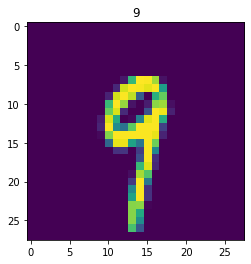

In [11]:
#Double check tha tour reshape is doing what we think it is!
imshow(x_train[600, 0, :, :])
title(y_train[600])

In [12]:
#Create dataloaders
train_ds = TensorDataset(torch.tensor(x_train, dtype = torch.float), torch.tensor(y_train, dtype = torch.long))
train_dl = DataLoader(train_ds, batch_size=64, shuffle = True, num_workers = 4, drop_last = True)

valid_ds = TensorDataset(torch.tensor(x_valid, dtype = torch.float), torch.tensor(y_valid, dtype = torch.long))
valid_dl = DataLoader(valid_ds, batch_size=256, shuffle = True, num_workers = 4, drop_last = True)

In [13]:
x, y = next(iter(train_dl))
for i in range(1, len(model)):
    a = model[:i](x)
    print(model[i], a.shape)

Tanh() torch.Size([64, 6, 24, 24])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([64, 6, 24, 24])
Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)) torch.Size([64, 6, 12, 12])
Tanh() torch.Size([64, 16, 8, 8])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([64, 16, 8, 8])
Lambda() torch.Size([64, 16, 4, 4])
Linear(in_features=256, out_features=120, bias=True) torch.Size([64, 256])
Tanh() torch.Size([64, 120])
Linear(in_features=120, out_features=84, bias=True) torch.Size([64, 120])
Tanh() torch.Size([64, 84])
Linear(in_features=84, out_features=10, bias=True) torch.Size([64, 84])


In [14]:
num_epochs = 15; lr = 1e-1; accuracies_cross_entropy = [] #We can use a higher learning rate with cross entroy loss. 

opt = optim.SGD(model.parameters(), lr=lr)
for i in range(num_epochs):
    for x, y in train_dl:
        yhat = model(x)
        loss = F.cross_entropy(yhat, y) #Takes care of softmax and one hot encoding for us!
        loss.backward() 
        opt.step(); opt.zero_grad();
    
    #Check validation loss and accuracy at the end of each epoch:
    model.eval() #Put in evaluation mode!
    with torch.no_grad():
        x, y = next(iter(valid_dl)) #Just measure on one minibatch
        yhat = model(x)
        max_values, max_indices = torch.max(yhat, dim=1)
        accuracy = (max_indices.eq(y).sum().float()/len(y)).item()
        accuracies_cross_entropy.append(accuracy)
        print('Epoch: ' + str(i+1) + ', training loss = ' + str(round(loss.item(), 3)) + \
              ', valid accuracy = ' + str(round(accuracy, 3)))

Epoch: 1, training loss = 0.224, valid accuracy = 0.957
Epoch: 2, training loss = 0.167, valid accuracy = 0.965
Epoch: 3, training loss = 0.036, valid accuracy = 0.98
Epoch: 4, training loss = 0.114, valid accuracy = 0.98
Epoch: 5, training loss = 0.046, valid accuracy = 0.984
Epoch: 6, training loss = 0.014, valid accuracy = 0.988
Epoch: 7, training loss = 0.011, valid accuracy = 1.0
Epoch: 8, training loss = 0.004, valid accuracy = 0.98
Epoch: 9, training loss = 0.014, valid accuracy = 0.988
Epoch: 10, training loss = 0.006, valid accuracy = 0.984
Epoch: 11, training loss = 0.003, valid accuracy = 0.996
Epoch: 12, training loss = 0.047, valid accuracy = 0.988
Epoch: 13, training loss = 0.02, valid accuracy = 0.98
Epoch: 14, training loss = 0.045, valid accuracy = 0.984
Epoch: 15, training loss = 0.007, valid accuracy = 0.992


In [15]:
#Measure Accuracy on complete validation set for better accuracy estimate:
x = torch.tensor(x_valid, dtype = torch.float)
y = torch.tensor(y_valid, dtype = torch.long)
yhat = model(x)
max_values, max_indices = torch.max(yhat, dim=1)
accuracy = (max_indices.eq(y).sum().float()/len(y)).item()
accuracy

0.9868000149726868

- We've acheived a ~99% test set accuracy with our LeNet-5 implementation!
- We did this be leveraging something we knew about images: **That the relative location of our pixels mater**, and that we can achieve very good performance by sliding the same convolutional kernel across our whole image. 
- If you're interested in the specific filters that LeNet-5 learns, Yann has some nice [visualizations](http://yann.lecun.com/exdb/lenet/index.html) of LeNet-5 in action on this website. 

### 1.6 Why Didn't Deep Learning Take Off in the Early 2000s?
---

- As we'll see, Yann's deep neural network architecture, LeNet-5 is remarkably similar to the models we use today. 
- However, as you may know, **deep learning** didn't really take off until ~2012. 
- What took so long? 
- How are modern deep learning models different than LeNet-5?
- In the next section, we'll discuss a bit of history, and then try to answer these questions. 

![](../graphics/spacer_small.png)

## 2. ImageNet and AlexNet
---

![](../graphics/fei_fei_li-01.png)

- Beginning around 2006, Fei Fei Li, then a new professor at the University of Illinois Urbana-Champaign, began working on building the largest labeled image dataset ever constructed. [Great Article on Fei Fei Li and ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/).
- She chose to use the [WordNet lexical database](https://en.wikipedia.org/wiki/WordNet) for her class labels, and to focus on finding images for each "synset" in Wordnet. 
- Li first tried hiring undergraduate students to perform annotation, but quickly found that this appraoch simple would not achieve the scale she needed, and instead used Amazon Mechanical Turk. 
- ImageNet was first published in 2009, and quickly developed into a public computer vision competition, the ImageNet Large Scale Visual Recognition Competition (ILSVRC). 
- ILSVRC used a subset of 1000 imaget classes, and included ~1.2M training images. 

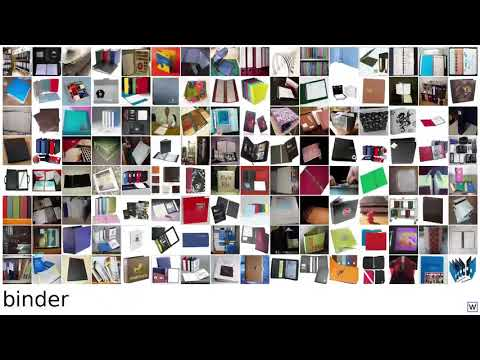

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('WO_mP-HPH4M', width = 1280, height=720)

- So, perhaps not surprisingly, ILSVRC turned out to be quite difficult. 
- The best performance achieved in 2010 was a top-5 test set error rate of **28.2%**. Top-5 means that the correct answer was one of the top five answers given by the network. 
- In 2011, the top-5 error rate dropped to **25.8%**, [achieved by a team from Xerox](http://image-net.org/challenges/LSVRC/2011/results) using SIFT and Fisher Vectors (FVs).
- And then...this happened:

### 2.1 Hinton et al Make Neural Networks Sexy Again...Again
---

![](../graphics/hinton_krizhevinsky-01.png)

- SuperVision, a team from the University of Toronto, led by Geoff Hinton (Remember Him?) **reduced the top-5 test set error by around 40%, down to 15.4%.**
- The model they used is today often called "AlexNet" after Alex Krizhevsky
- So, how did Hinton's team acheive such a huge increase in performance? What type of magic was afoot? 
- Let's have a closer look at the [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).
- Hinton's team used a deep neural network, not all that different from LeNet-5:

![](../graphics/alexnet_paper_screenshots/architecture.png)

- This figure drives be crazy becuase the top part is cropped off in the original paper, one of these days I'm going to make a non-cropped version. 
- There's also apparently an error in the paper - the input image size should be 227x227. 
- Let's take some time to talk throught the **Alexnet** architecture. 
- First, this figure shows 2 copies of most layers - **why?**
- Next, why is our output of dimenion 1000? 

![](../graphics/spacer_small.png)

### 2.2 Simplified AlexNet Walkthough
---

- Alright, let's walk through AlexNet in detail.
- We'll use a simplified AlexNet, where we merge Alex's two GPU pipelines into one.
- We can grab a pretrained version of Alexnet using [torchvision](https://pytorch.org/docs/stable/torchvision/index.html).

In [118]:
import torchvision.models as models
alexnet = models.alexnet(pretrained = True)

In [119]:
alexnet.eval() #Put Model into evaluation mode

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

![](../graphics/simplified_alexnet.png)

![](../graphics/alexnet_walkthrough_full.png)

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
%pylab inline

Populating the interactive namespace from numpy and matplotlib


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [ ]:
with open("../data_sample/imagenet_labels.txt") as f:
    idx2label = eval(f.read())

In [110]:
import glob
from PIL import Image
from torchvision import transforms
file_names = glob.glob('../data/imagenette-320/val/*/*.JPEG')
im = Image.open(file_names[100])

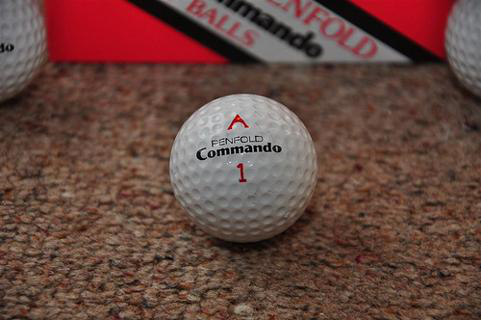

In [111]:
im

In [112]:
im.size

(481, 320)

In [113]:
im.bits

8

In [114]:
tfms = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [115]:
im_tensor = tfms(im)

In [116]:
im_tensor.shape

torch.Size([3, 224, 224])

(array([ 6427.,  7691., 27250., 47233., 29392., 17057.,  7811.,  4312.,
         3179.,   176.]),
 array([-2.117904  , -1.7292595 , -1.340615  , -0.95197064, -0.5633262 ,
        -0.17468172,  0.21396272,  0.6026072 ,  0.9912516 ,  1.379896  ,
         1.7685405 ], dtype=float32),
 <a list of 10 Patch objects>)

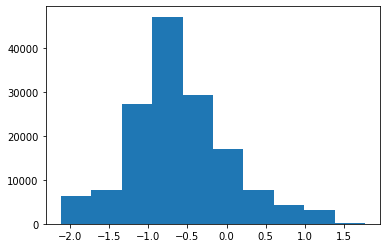

In [117]:
hist(im_tensor.numpy().ravel())

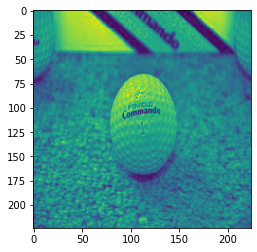

In [94]:
imshow(im_tensor.numpy()[0, :, :])

In [95]:
yhat = alexnet(im_tensor[None])

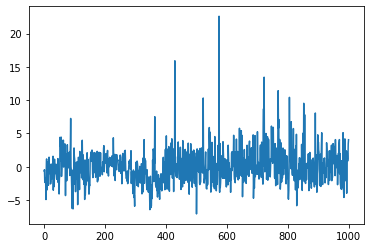

In [96]:
plot(yhat.detach().numpy().ravel());

In [97]:
yhat.sum()

tensor(0.0231, grad_fn=<SumBackward0>)

In [98]:
yhat.shape

torch.Size([1, 1000])

In [99]:
yhat = nn.Softmax(dim =1)(yhat)

In [100]:
yhat.sum()

tensor(1., grad_fn=<SumBackward0>)

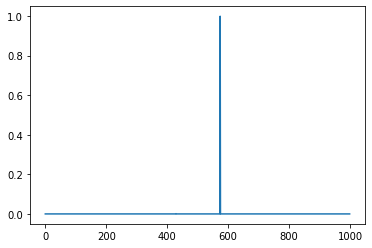

In [101]:
plot(yhat.detach().numpy().ravel());

In [102]:
torch.argmax(yhat).item()

574

In [103]:


for idx in yhat[0].sort()[1][-10:]:
    print(idx2label[idx.item()])

thimble
volleyball
pill bottle
tennis ball
croquet ball
soccer ball
rugby ball
ping-pong ball
baseball
golf ball


In [104]:
idx2label[torch.argmax(yhat).item()]

'golf ball'

In [105]:
idx2label[766]

'rotisserie'

In [106]:
idx2label[767]

'rubber eraser, rubber, pencil eraser'

In [312]:
idx2label[765]

'rocking chair, rocker'

In [313]:
idx2label[10]

'brambling, Fringilla montifringilla'

In [314]:
idx2label

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [36]:
normalize

Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [43]:
t = transforms.ToTensor()(im)

In [44]:
t.shape

torch.Size([3, 219, 230])

In [45]:
t

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [ ]:
model.classifier[6] = nn.Linear(4096,num_classes)
